In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.

text_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
text_raw.columns = ['message', 'sentiment']

In [3]:
text_raw.dtypes
len(text_raw)


1000

In [4]:
text_raw.head()
mycount = len(text_raw[text_raw['sentiment'] == 0])
mycount

500

In [5]:
# Create some features
keywords = ['excellent', 'great', 'winner', 'waste', 'hate', 'love', 'horrible']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    text_raw[str(key)] = text_raw.message.str.contains(
        str(key),
        case=False
    )

In [6]:
# Creat another feature All Caps means Passion 
text_raw['allcaps'] = text_raw.message.str.isupper()

In [7]:
text_raw.head()

,message,sentiment,excellent,great,winner,waste,hate,love,horrible,allcaps
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,True,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,True,False,False,False,False,False,False


In [8]:
# make boolean 
#text_raw['spam'] = (text_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [9]:
text_raw.head()

,message,sentiment,excellent,great,winner,waste,hate,love,horrible,allcaps
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,True,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,True,False,False,False,False,False,False


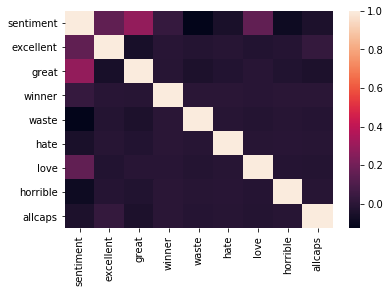

In [10]:
# Make correlation matrix to determine how independent the varibles are
sns.heatmap(text_raw.corr())

In [11]:
# creat outcome and input data sets for SKlearn 
data = text_raw[keywords + ['allcaps']]
target = text_raw['sentiment']

In [12]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 366
